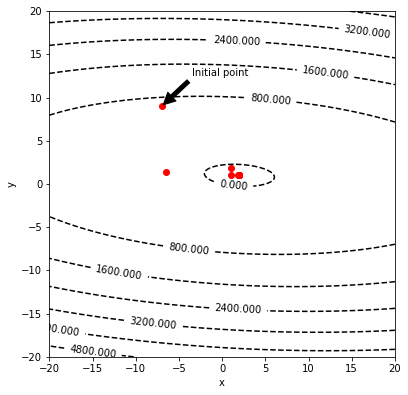

In [115]:
import numpy as np
import sympy as sym
import xlsxwriter
from math import *
import matplotlib.pyplot as plt

#To calc steepest step size used nelder-mead algorithm from library
from scipy.optimize import minimize
#############################################################
def calcGrad(expression, Symbols):
    grad = []
    for i in range (len(Symbols)):
        grad.append(sym.diff(expression,Symbols[i] ))
    return grad

# Below symbolic calculation of gradient is performed
x, y = sym.symbols('x y')
expr = x**2 +x*y +10* y**2 -22*y - 5*x
grad = calcGrad(expr, np.array([x,y]))
func_call = 0
grad_call = 0
f = sym.lambdify([x, y], expr, "numpy") 
g = sym.lambdify([x, y], grad, "numpy") 
# end of symbolic calculation

#functions to calc function and gradient value presented
def evalFunc(args):
    global  func_call
    global f
    func_call+=1;
    return f(*args)

def evalGrad(args):
    global  grad_call
    global g
    grad_call+=1;
    return np.array(g(*args))
# end of functions to calc function and gradient

def findSteepestStep(x0,grad):
    func_from_step = lambda step: evalFunc(x0 - step * grad)
    res = minimize(func_from_step, 0.5, method='nelder-mead',
               options={'xatol': 1e-6, 'disp': False})
    return res.x

def writeArrayToXLS(array):
    workbook = xlsxwriter.Workbook('arrays.xlsx')
    worksheet = workbook.add_worksheet()
    col = 2
    for row, data in enumerate(array):
        worksheet.write_row(row+2, col, data)
    workbook.close()

def printPlot(array):
    fig = plt.figure(figsize=(6,6))
    left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
    ax = fig.add_axes([left, bottom, width, height]) 

    start, stop, n_values = -20, 20, 2000
    x_vals = np.linspace(start, stop, n_values)
    y_vals = np.linspace(start, stop, n_values)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = evalFunc([X,Y])

    cp = plt.contour(X, Y, Z, colors='black', linestyles='dashed')
    plt.clabel(cp, inline=True, fontsize=10)
    plt.xlabel('x')
    plt.ylabel('y')
    for i in range (len(array_to_xls)):
        plt.plot(array_to_xls[i][1],array_to_xls[i][2], 'ro')
    ax.annotate('Initial point', xy=(array_to_xls[0][1],array_to_xls[0][2]), 
                xytext=(array_to_xls[0][1] +3.5 ,array_to_xls[0][2] +3.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
    plt.show()
    
    
# algorithm initialization
eps = 1e-6
x0 = np.array([-7.0,9.0])
gradient = evalGrad(x0)
f_min_prev = evalFunc(x0)
iterations = 0
array_to_xls = [[iterations,*x0, f_min_prev ]]

# main cycle with function delta as stopping criteria
while (abs(np.linalg.norm(f_min_cur-f_min_prev))>eps):    
    step = findSteepestStep(x0, gradient)
    x0 -= step * gradient
    f_min_prev = f_min_cur
    f_min_cur = evalFunc(x0)
    gradient = evalGrad(x0)
    iterations+=1
    array_to_xls.append([iterations,*x0, f_min_cur ])

writeArrayToXLS(array_to_xls)
printPlot(array_to_xls)
